BSc Galaxies Project: Introduction
==================================

Nearly a century ago, Edwin Hubble famously classified galaxies into three distinct groups:
ellipticals, spirals and irregulars. He produced a diagram of these galaxies, called the Hubble Tuning Fork, which
is shown below and still discussed by astronomers in the modern day:

![HubbleTuning](https://github.com/Jammy2211/autogalaxy_workspace/blob/main/scripts/howtogalaxy/chapter_1_introduction/HubbleTuningFork.jpg?raw=true)

To make his diagram, Hubble looked at images of each galaxy in his sample, and subjectively judged by eye how
to classify it. Today, Astronomers use computer software, statistical algorithms and image processing techniques to
perform this task in a more quantifiable and objective way.

These tutorials will teach you how to perform this analysis yourself, using the open-source software
package **PyAutoGalaxy** used by professional Astronomy researchers. By the end, you'll be able to take an image of a
galaxy and study its morphology and structure using the same techniques that professional astronomers use today.

Tutorial 1: Grids And Galaxies
==============================

In this tutorial, we will introduce the fundamental concepts and quantities used to study galaxy morphology.
These concepts will enable us to create images of galaxies and analyze how their light is distributed across space.
Additionally, we will explore how adjusting various properties of galaxies can alter their appearance. For instance,
we can change the size of a galaxy, rotate it, or modify its brightness.

To create these images, we first need to define 2D grids of $(y, x)$ coordinates. We will shift and rotate these
grids to manipulate the appearance of the galaxy in the generated images. The grid will serve as the input for light
profiles, which are analytic functions that describe the distribution of a galaxy's light. By evaluating these light
profiles on the grid, we can effectively generate images that represent the structure and characteristics of galaxies.

Here is an overview of what we'll cover in this tutorial:

- **Grids**: Create a uniform grid of $(y,x)$ coordinates and show how it can be used to measure the light of a galaxy.
- **Geometry**: How to shift and rotate a grid, and convert it to elliptical coordinates.
- **Light Profiles**: Using light profiles, analytic functions that describe how a galaxy's light is distributed.
- **Galaxies**: Creating galaxies containing light profiles and computing the image of a galaxy.
- **Units**: Converting the units of a galaxy's image to physical units like kiloparsecs.

The imports below are required to run the tutorials in a Jupiter notebook. They also import the
`autogalaxy` package and the `autogalaxy.plot` module which are used throughout the tutorials.

In [2]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import numpy as np

import autogalaxy as ag
import autogalaxy.plot as aplt

C:\Users\Jammy\Code\PyAuto\BSc_Galaxies_Project
Working Directory has been set to `C:\Users\Jammy\Code\PyAuto\BSc_Galaxies_Project`


C:\Users\Jammy\anaconda3\envs\PyAuto311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


__Grids__

A `Grid2D` is a set of two-dimensional $(y,x)$ coordinates that represent points in space where we evaluate the 
light emitted by a galaxy.

Each coordinate on the grid is referred to as a 'pixel'. This is because we use the grid to create the image of a
galaxy at each of these coordinates, meaning that each coordinate maps to the centre of each pixel in this image.

Grids are defined in units of 'arc-seconds' ("). An arc-second is a unit of angular measurement used by astronomers to 
describe the apparent size of objects in the sky.

The `pixel_scales` parameter sets how many arc-seconds each pixel represents. For example, if `pixel_scales=0.1`, 
then each pixel covers 0.1" of the sky.

Below, we create a uniform 2D grid of 101 x 101 pixels with a pixel scale of 0.1", corresponding to an area 
of 10.1" x 10.1", spanning from -5.05" to 5.05" in both the y and x directions.

In [3]:
grid = ag.Grid2D.uniform(
    shape_native=(
        101,
        101,
    ),  # The dimensions of the grid, which here is 101 x 101 pixels.
    pixel_scales=0.1,  # The conversion factor between pixel units and arc-seconds.
)

We can visualize this grid as a uniform grid of dots, each representing a coordinate where the light is measured.

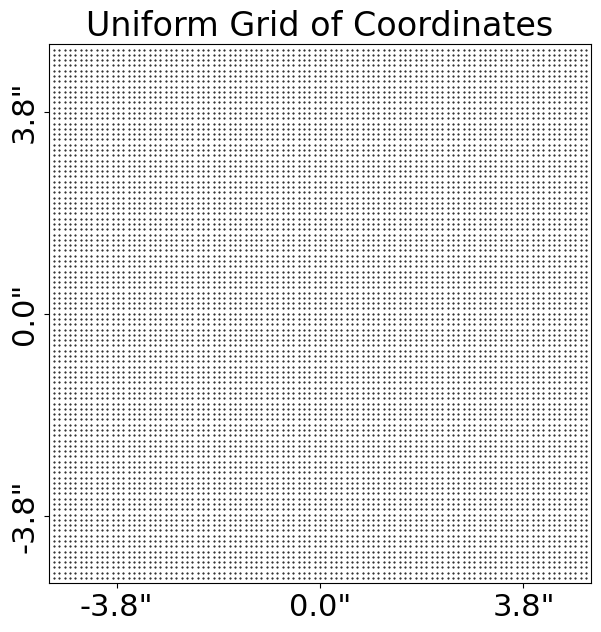

In [4]:
grid_plotter = aplt.Grid2DPlotter(grid=grid)
grid_plotter.set_title("Uniform Grid of Coordinates")
grid_plotter.figure_2d()

Each coordinate in the grid corresponds to an arc-second position. Below, we print a few of these coordinates to see 
the values.

In [5]:
print("(y,x) pixel 0:")
print(grid.native[0, 0])  # The coordinate of the first pixel.
print("(y,x) pixel 1:")
print(grid.native[0, 1])  # The coordinate of the second pixel.
print("(y,x) pixel 2:")
print(grid.native[0, 2])  # The coordinate of the third pixel.
print("(y,x) pixel 100:")
print(grid.native[1, 0])  # The coordinate of the 100th pixel.
print("...")

(y,x) pixel 0:
Grid2D([ 5., -5.])
(y,x) pixel 1:
Grid2D([ 5. , -4.9])
(y,x) pixel 2:
Grid2D([ 5. , -4.8])
(y,x) pixel 100:
Grid2D([ 4.9, -5. ])
...


Grids have two internal representations, `native` and `slim`:

- `native`: A 2D array with shape [total_y_pixels, total_x_pixels, 2], where the 2 corresponds to the (y,x) coordinates.
- `slim`: A 1D array with shape [total_y_pixels * total_x_pixels, 2], where the coordinates are 'flattened' into a single list.

These formats are useful for different calculations and plotting. Here, we show the same coordinate using both formats.

In [6]:
print("(y,x) pixel 0 (accessed via native):")
print(grid.native[0, 0])
print("(y,x) pixel 0 (accessed via slim 1D):")
print(grid.slim[0])

(y,x) pixel 0 (accessed via native):
Grid2D([ 5., -5.])
(y,x) pixel 0 (accessed via slim 1D):
Grid2D([ 5., -5.])


We can also check the shapes of the `Grid2D` object in both `native` and `slim` formats. For this grid, 
the `native` shape is (101, 101, 2) and the `slim` shape is (10201, 2).

In [7]:
print(grid.native.shape)
print(grid.slim.shape)

(101, 101, 2)
(10201, 2)


For these tutorials, you don't need to fully understand why grids have both `native` and `slim` representations and
should simply us whatever is most intuitive for the task you are performing.

*Exercise: Try creating grids with different `shape_native` and `pixel_scales` using the `ag.Grid2D.uniform()` function above.  Observe how the grid coordinates change when you adjust `shape_native` and `pixel_scales`.*

__Geometry__

The above grid is centered on the origin $(0.0", 0.0")$. Sometimes, we need to shift the grid to be centered on a 
specific point, like the center of a galaxy.

We can shift the grid to a new center, $(y_c, x_c)$, by subtracting this center from each coordinate.

In [8]:
centre = (0.3, 0.5)  # Shifting the grid to be centered at y=1.0", x=2.0".

grid_shifted = grid
grid_shifted[:, 0] = grid_shifted[:, 0] - centre[0]  # Shift in y-direction.
grid_shifted[:, 1] = grid_shifted[:, 1] - centre[1]  # Shift in x-direction.

print("(y,x) pixel 0 After Shift:")
print(grid_shifted.native[0, 0])  # The coordinate of the first pixel after shifting.

(y,x) pixel 0 After Shift:
Grid2D([ 4.7, -5.5])


The grid is now centered around $(0.3", 0.5")$. We can plot the shifted grid to see this change.

*Exercise: Try shifting the grid to a different center, for example $(0.0", 0.0")$ or $(2.0", 3.0")$. Observe how the center of the grid changes when you adjust the `centre` variable.*

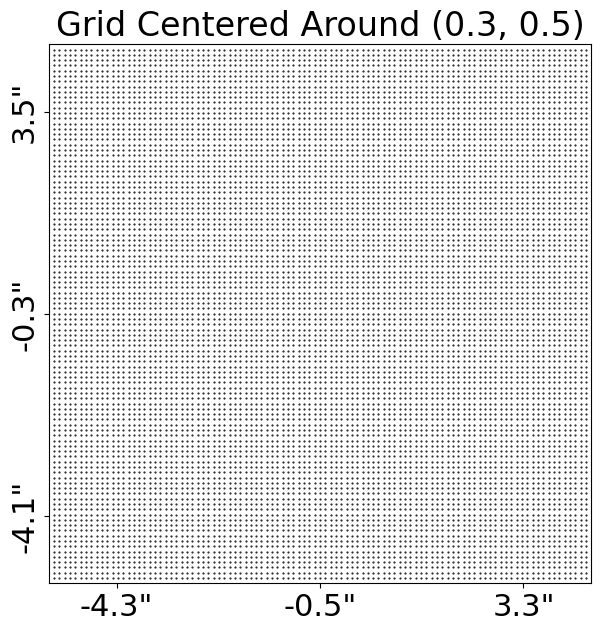

In [9]:
grid_plotter = aplt.Grid2DPlotter(grid=grid_shifted)
grid_plotter.set_title("Grid Centered Around (0.3, 0.5)")
grid_plotter.figure_2d()

Next, we can rotate the grid by an angle `phi` (in degrees). The rotation is counter-clockwise from the positive x-axis.

To rotate the grid:

1. Calculate the distance `radius` of each coordinate from the origin using $r = \sqrt{y^2 + x^2}$.
2. Determine the angle `theta` counter clockwise from the positive x-axis using $\theta = \arctan(y / x)$.
3. Adjust `theta` by the rotation angle and convert back to Cartesian coordinates via $y_r = r \sin(\theta)$ and $x_r = r \cos(\theta)$.

In [10]:
angle_degrees = 60.0

y = grid_shifted[:, 0]
x = grid_shifted[:, 1]

radius = np.sqrt(y**2 + x**2)
theta = np.arctan2(y, x) - np.radians(angle_degrees)

grid_rotated = grid_shifted
grid_rotated[:, 0] = radius * np.sin(theta)
grid_rotated[:, 1] = radius * np.cos(theta)

print("(y,x) pixel 0 After Rotation:")
print(grid_rotated.native[0, 0])  # The coordinate of the first pixel after rotation.

(y,x) pixel 0 After Rotation:
Grid2D([7.11313972, 1.3203194 ])


The grid has now been rotated 60 degrees counter-clockwise. We can plot it to see the change.

*Exercise: Try rotating the grid by a different angle, for example 30 degrees or 90 degrees. Observe how the grid changes when you adjust the `angle_degrees` variable.*

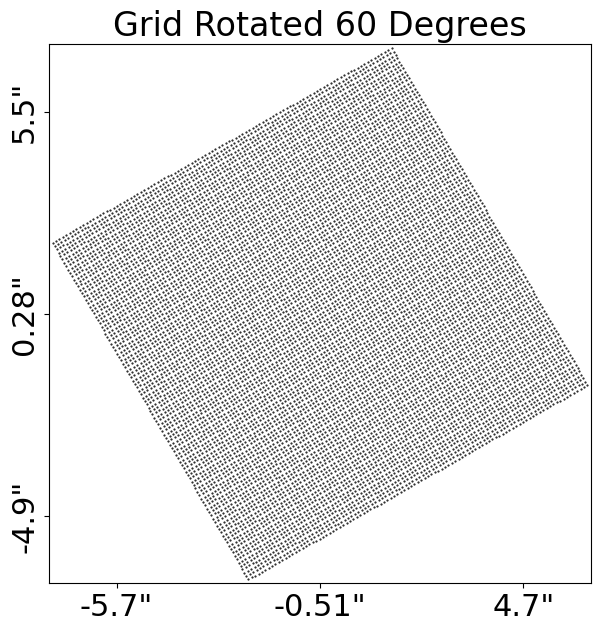

In [11]:
grid_plotter = aplt.Grid2DPlotter(grid=grid_rotated)
grid_plotter.set_title("Grid Rotated 60 Degrees")
grid_plotter.figure_2d()

Next, we convert the rotated grid to elliptical coordinates using:

$\eta = \sqrt{(x_r)^2 + (y_r)^2/q^2}$

Where `q` is the axis-ratio of the ellipse and $(x_r, y_r)$ are the rotated coordinates. 

Elliptical coordinates are a system used to describe positions in relation to an ellipse rather than a circle. They 
are particularly useful in astronomy when dealing with objects like galaxies, which often have elliptical shapes 
due to their inclination or intrinsic shape.

*Exercise: Try converting the grid to elliptical coordinates using a different axis-ratio, for example 0.3 or 0.8. What happens to the grid when you adjust the `axis_ratio` variable?*

In [12]:
axis_ratio = 0.5
eta = np.sqrt((grid_rotated[:, 0]) ** 2 + (grid_rotated[:, 1]) ** 2 / axis_ratio**2)

print("First Ten Elliptical Coordinates:")
print(eta[:10])

First Ten Elliptical Coordinates:
[7.58747191 7.54210354 7.49879467 7.4575812  7.41849804 7.38157903
 7.3468568  7.31436263 7.28412634 7.25617615]


Above, the angle $\phi$ (in degrees) was used to rotate the grid, and the axis-ratio $q$ was used to convert the grid 
to elliptical coordinates.

From now on, we'll describe ellipticity using "elliptical components" $\epsilon_{1}$ and $\epsilon_{2}$, calculated 
from $\phi$ and $q$:

$\epsilon_{1} = \frac{1 - q}{1 + q} \sin(2\phi)$  
$\epsilon_{2} = \frac{1 - q}{1 + q} \cos(2\phi)$

We'll refer to these as `ell_comps` in the code for brevity.

*Exercise*: Try computing the elliptical components from the axis-ratio and angle above. What happens to the elliptical
components when you adjust the `axis_ratio` and `angle_degrees` variables?

In [13]:
fac = (1 - axis_ratio) / (1 + axis_ratio)
epsilon_y = fac * np.sin(2 * np.radians(angle_degrees))
epsilon_x = fac * np.cos(2 * np.radians(angle_degrees))

ell_comps = (epsilon_y, epsilon_x)

print("Elliptical Components:")
print(ell_comps)


Elliptical Components:
(0.28867513459481287, -0.16666666666666657)


__Light Profiles__

Galaxies are collections of stars, gas, dust, and other astronomical objects that emit light. Astronomers study this 
light to understand various properties of galaxies.

To model the light of a galaxy, we use light profiles, which are mathematical functions that describe how a galaxy's 
light is distributed across space. By applying these light profiles to 2D grids of $(y, x)$ coordinates, we can 
create images that represent a galaxy's luminous emission.

A commonly used light profile is the `Sersic` profile, which is widely adopted in astronomy for representing galaxy 
light. The `Sersic` profile is defined by the equation:

$I_{\rm Ser} (\eta_{\rm l}) = I \exp \left\{ -k \left[ \left( \frac{\eta}{R} \right)^{\frac{1}{n}} - 1 \right] \right\}$

In this equation:

 - $\eta$ represents the elliptical coordinates of the profile in arc-seconds (refer to earlier sections for elliptical coordinates).
 - $I$ is the intensity normalization of the profile, given in arbitrary units, which controls the overall brightness of the Sersic profile.
 - $R$ is the effective radius in arc-seconds, which determines the size of the profile.
 - $n$ is the Sersic index, which defines how 'steep' the profile is, influencing the concentration of light.
 - $k$ is a constant that ensures half the light of the profile lies within the radius $R$, where $k = 2n - \frac{1}{3}$.

We can evaluate this function using values for $(\eta, I, R, n)$ to calculate the intensity of the profile at 
a particular elliptical coordinate.

In [14]:
elliptical_coordinate = (
    0.5  # The elliptical coordinate where we compute the intensity, in arc-seconds.
)
intensity = 1.0  # Intensity normalization of the profile in arbitrary units.
effective_radius = 2.0  # Effective radius of the profile in arc-seconds.
sersic_index = 1.0  # Sersic index of the profile.
k = 2 * sersic_index - (
    1.0 / 3.0
)  # Calculating the constant k, note that this is an approximation.

# Calculate the intensity of the Sersic profile at a specific elliptical coordinate.
sersic_value = np.exp(
    -k * ((elliptical_coordinate / effective_radius) ** (1.0 / sersic_index) - 1.0)
)

print("Intensity of Sersic Light Profile at Elliptical Coordinate 0.5:")
print(sersic_value)

Intensity of Sersic Light Profile at Elliptical Coordinate 0.5:
3.4903429574618414


The calculation above gives the intensity of the Sersic profile at an elliptical coordinate of 0.5.

To create a complete image of the Sersic profile, we can evaluate the intensity at every point in our grid of 
elliptical coordinates.

In [15]:
sersic_image = np.exp(-k * ((eta / effective_radius) ** (1.0 / sersic_index) - 1.0))

When we plot the resulting image, we can see how the properties of the grid affect its appearance:

 - The peak intensity is at the position $(0.3", 0.5")$, where we shifted the grid.
 - The image is elongated along a 60° counter-clockwise angle, corresponding to the rotation of the grid.
 - The image has an elliptical shape, consistent with the axis ratio of 0.5.

This demonstrates how the geometry of the grid directly influences the appearance of the light profile.

*Exercise: Try changing the values of `centre`, `ell_comps`, `effective_radius`, and `sersic_index` above. Observe how these adjustments change the Sersic profile image.*

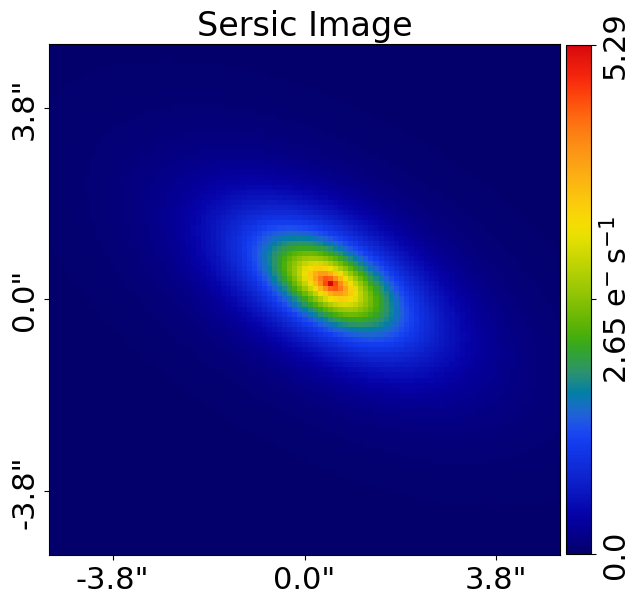

In [16]:
array_plotter = aplt.Array2DPlotter(
    array=ag.Array2D(
        values=sersic_image, mask=grid.mask
    ),  # The `Array2D` object is discussed below.
)
array_plotter.set_title("Sersic Image")
array_plotter.figure_2d()

Instead of manually handling these transformations, we can use `LightProfile` objects from the `light_profile` 
module (`lp`) for faster and more efficient calculations.

Below, we define a `Sersic` light profile using the `Sersic` object. We can print the profile to display its parameters.

In [17]:
sersic_light_profile = ag.lp.Sersic(
    centre=(0.0, 0.0),
    ell_comps=(0.0, 0.1),
    intensity=1.0,
    effective_radius=2.0,
    sersic_index=1.0,
)

print(sersic_light_profile)

Sersic
centre: (0.0, 0.0)
ell_comps: (0.0, 0.1)
intensity: 1.0
effective_radius: 2.0
sersic_index: 1.0


With this `Sersic` light profile, we can create an image by passing a grid to its `image_2d_from` method.

The calculation will internally handle all the coordinate transformations and intensity evaluations we performed 
manually earlier, making it much simpler.

The `Sersic` profile we created just above is different from the one we used to manually compute the image,
so the image will look different. However, the process is the same.

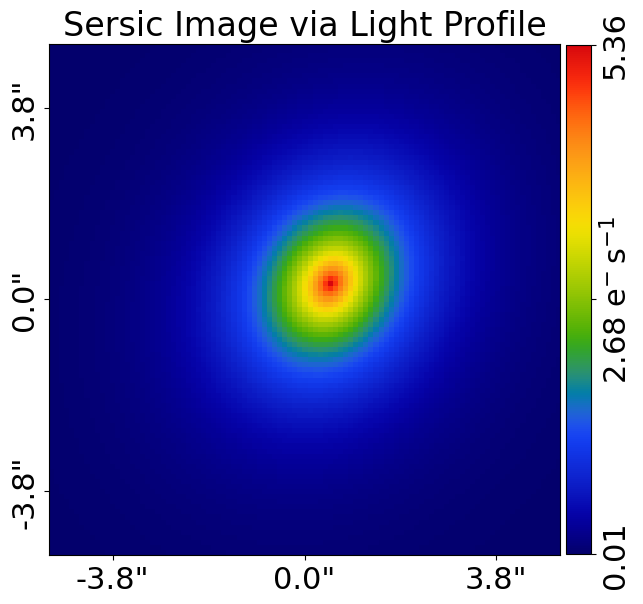

In [18]:
image = sersic_light_profile.image_2d_from(grid=grid)

array_plotter = aplt.Array2DPlotter(
    array=image,
)
array_plotter.set_title("Sersic Image via Light Profile")
array_plotter.figure_2d()

The `image` is returned as an `Array2D` object. Similar to a `Grid2D`, it has two forms:

 - `native`: A 2D array with shape [total_y_image_pixels, total_x_image_pixels].
 - `slim`: A 1D array that flattens this data into shape [total_y_image_pixels * total_x_image_pixels].

The `native` form is often used for visualizations, while the `slim` form can be useful for certain calculations.

In [19]:
print("Intensity of pixel 0:")
print(image.native[0, 0])
print("Intensity of pixel 1:")
print(image.slim[1])

Intensity of pixel 0:
0.006760911599329747
Intensity of pixel 1:
0.007276927485152244


To visualize the light profile's image, we use a `LightProfilePlotter`.

We provide it with the light profile and the grid, which are used to create and plot the image.

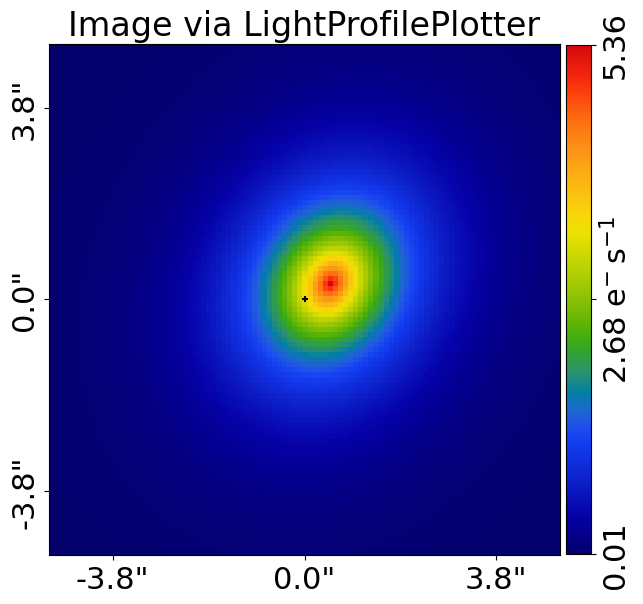

In [20]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.set_title("Image via LightProfilePlotter")
light_profile_plotter.figures_2d(image=True)

The `LightProfilePlotter` also has methods to plot the 1D radial profile of the light profile. This profile shows
how the intensity of the light changes as a function of distance from the profile's center. This is a more informative
way to visualize the light profile's distribution.

The 1D plot below is a `semilogy` plot, meaning that the x-axis (showing the radial distance in arc-seconds) is linear,
while the y-axis (showing the intensity) is log10. This is a common way to visualize light profiles, as it highlights
the fainter outer regions of the profile. A log x-axis is also a common choice.

*Exercise: Try plotting the 1D radial profile of Sersic profiles with different effective radii and Sersic indices. Does the 1D representation show more clearly how the light distribution changes with these parameters?*

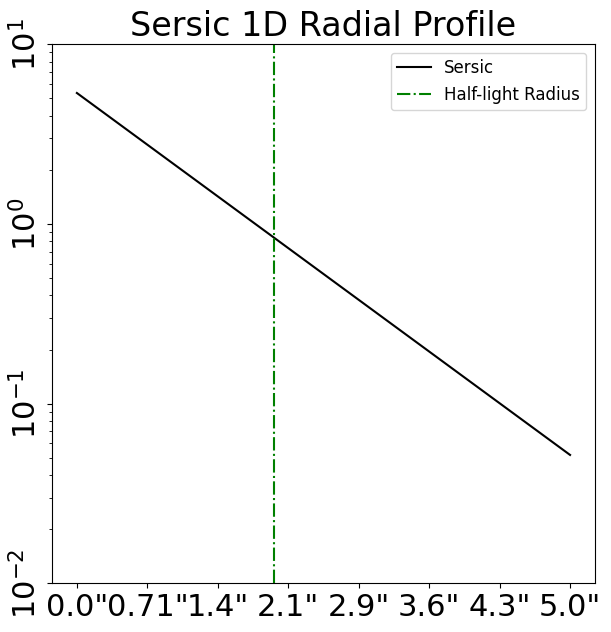

In [21]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile, grid=grid
)
light_profile_plotter.set_title("Sersic 1D Radial Profile")
light_profile_plotter.figures_1d(image=True)

Since galaxy light distributions often cover a wide range of values, they are typically better visualized on a log10 
scale. This approach helps highlight details in the faint outskirts of a light profile.

The `MatPlot2D` object has a `use_log10` option that applies this transformation automatically. Below, you can see 
that the image plotted in log10 space reveals more details.

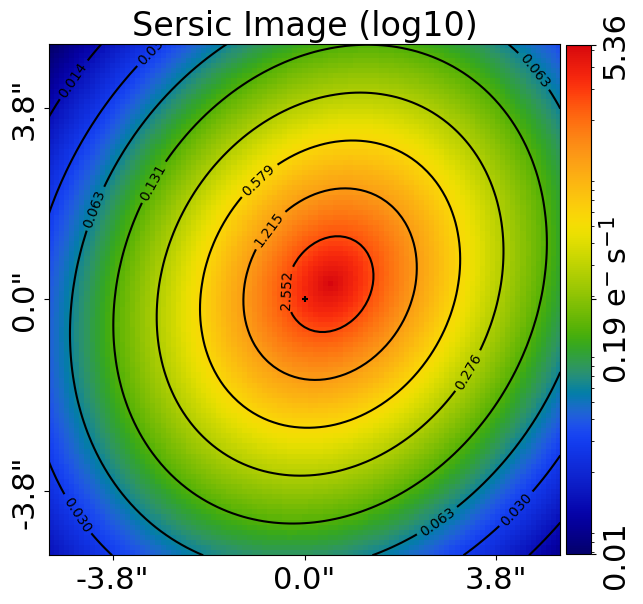

In [22]:
light_profile_plotter = aplt.LightProfilePlotter(
    light_profile=sersic_light_profile,
    grid=grid,
    mat_plot_2d=aplt.MatPlot2D(use_log10=True),
)
light_profile_plotter.set_title("Sersic Image")
light_profile_plotter.figures_2d(image=True)

__Galaxies__

Now, let's introduce `Galaxy` objects, which are key components in **PyAutoGalaxy**.

A light profile represents a single feature of a galaxy, such as its bulge or disk. To model a complete galaxy, 
we combine multiple `LightProfiles` into a `Galaxy` object. This allows us to create images that include different 
components of a galaxy.

In addition to light profiles, a `Galaxy` has a `redshift`, which indicates how far away it is from Earth. The redshift 
is essential for performing unit conversions using cosmological calculations, such as converting arc-seconds into 
kiloparsecs (kpc, a kiloparsec is a distance unit in astronomy, equal to about 3.26 million light-years.)

Let's start by creating a galaxy with two `Sersic` light profiles, which notationally we will consider to represent
a bulge and disk component of the galaxy, the two most important structures seen in galaxies which drive the
Hubble tuning fork classification shown at the beginning of this tutorial.

In [23]:
bulge = ag.lp.Sersic(
    centre=(0.0, 0.0),
    ell_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

disk = ag.lp.Sersic(
    centre=(0.0, 0.0),
    ell_comps=(0.0, 0.3),
    intensity=0.3,
    effective_radius=3.0,
    sersic_index=1.0,
)

galaxy = ag.Galaxy(redshift=0.5, bulge=bulge, disk=disk)

print(galaxy)

Redshift: 0.5
Light Profiles:
Sersic
centre: (0.0, 0.0)
ell_comps: (0.0, 0.111111)
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
Sersic
centre: (0.0, 0.0)
ell_comps: (0.0, 0.3)
intensity: 0.3
effective_radius: 3.0
sersic_index: 1.0


We can pass a 2D grid to a light profile to compute its image using the `image_2d_from` method. 

The same approach works for a `Galaxy` object:

Intensity of `Grid2D` pixel 0:
0.009187925928272507
Intensity of `Grid2D` pixel 1:
0.009752939062047099
Intensity of `Grid2D` pixel 2:
0.010352302998574738
...


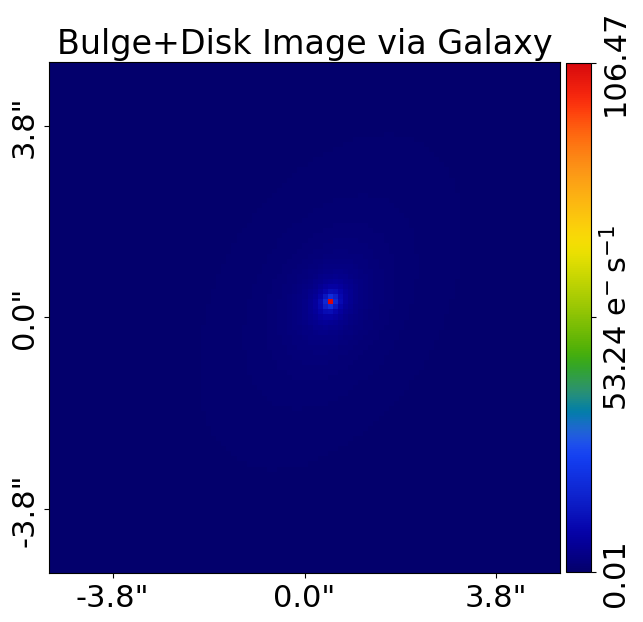

In [24]:
image = galaxy.image_2d_from(grid=grid)

print("Intensity of `Grid2D` pixel 0:")
print(image.native[0, 0])
print("Intensity of `Grid2D` pixel 1:")
print(image.native[0, 1])
print("Intensity of `Grid2D` pixel 2:")
print(image.native[0, 2])
print("...")

array_plotter = aplt.Array2DPlotter(
    array=image,
)
array_plotter.set_title("Bulge+Disk Image via Galaxy")
array_plotter.figure_2d()

We can use a `GalaxyPlotter` to plot the galaxy's image, just like how we used `LightProfilePlotter` for a light 
profile.

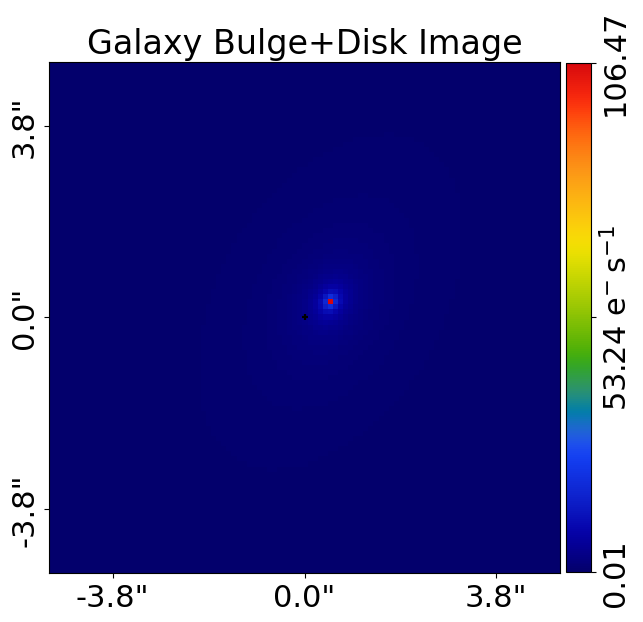

In [25]:
galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy, grid=grid)
galaxy_plotter.set_title("Galaxy Bulge+Disk Image")
galaxy_plotter.figures_2d(image=True)

The bulge dominates the center of the image, and is pretty much the only luminous emission we see can see on a linear
scale. The disk's emission is present, but it is much fainter and spread over a larger area.

We can confirm this using the `subplot_of_light_profiles` method, which plots each individual light profile separately.

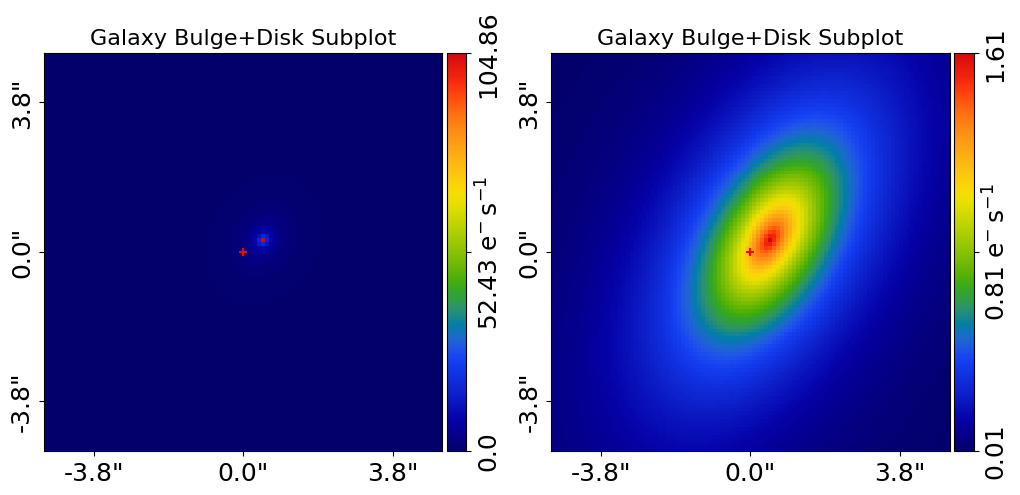

In [26]:
galaxy_plotter.set_title("Galaxy Bulge+Disk Subplot")
galaxy_plotter.subplot_of_light_profiles(image=True)

Because galaxy light distributions often follow a log10 pattern, plotting in log10 space helps reveal details in the 
outskirts of the light profile, in this case the emission of the disk.

This is especially helpful to separate the bulge and disk profiles, which have different intensities and sizes.

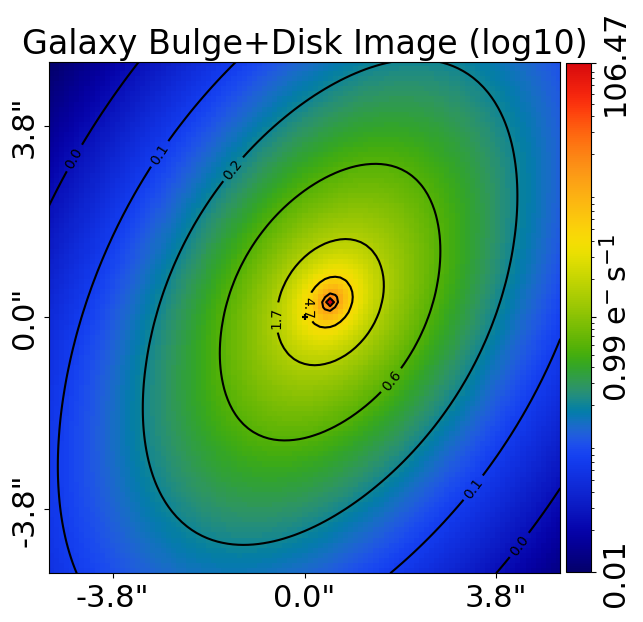

In [27]:
galaxy_plotter = aplt.GalaxyPlotter(
    galaxy=galaxy, grid=grid, mat_plot_2d=aplt.MatPlot2D(use_log10=True)
)
galaxy_plotter.set_title("Galaxy Bulge+Disk Image")
galaxy_plotter.figures_2d(image=True)

The `figures_1d_decomposed` method allows us to visualize each light profile's contribution in 1D.

1D plots show the intensity of the light profile as a function of distance from the profile’s center. The bulge
and disk profiles share the same `centre`, meaning that plotting them together shows how they overlap. If the
`centre` of the profiles were different, they would still be plotted on top of each other, but as a user you
would need to remember that the profiles are not aligned in 2D.

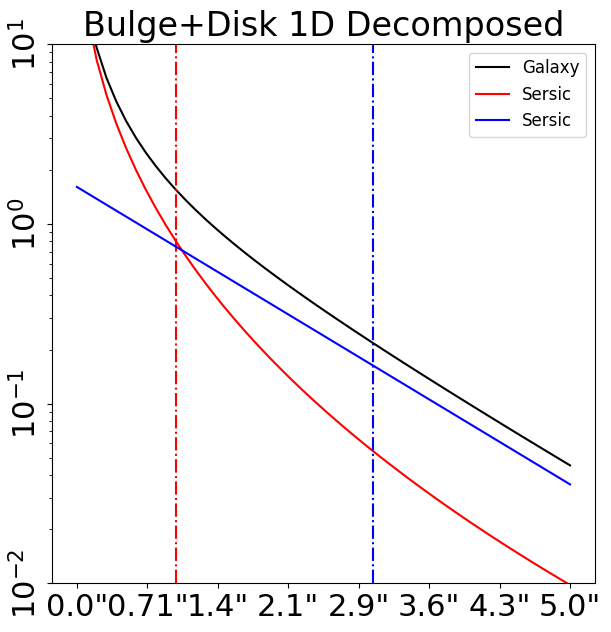

In [28]:
galaxy_plotter.set_title("Bulge+Disk 1D Decomposed")
galaxy_plotter.figures_1d_decomposed(image=True)

We can group multiple galaxies at the same redshift into a `Galaxies` object, which is created from a list of 
individual galaxies.

Below, we create an additional galaxy and combine it with the original galaxy into a `Galaxies` object. This could
represent two galaxies merging or interacting with each other, which is commonly seen in studies of galaxy evolution.

In [29]:
extra_galaxy = ag.Galaxy(
    redshift=0.5,
    bulge=ag.lp.Sersic(
        centre=(0.2, 0.3),
        ell_comps=(0.0, 0.111111),
        intensity=1.0,
        effective_radius=1.0,
        sersic_index=2.5,
    ),
)

galaxies = ag.Galaxies(galaxies=[galaxy, extra_galaxy])

The `Galaxies` object has similar methods as those for light profiles and individual galaxies.

For example, `image_2d_from` sums the images of all the galaxies.

In [30]:
image = galaxies.image_2d_from(grid=grid)

We can plot the combined image using a `GalaxiesPlotter`, just like with other plotters.

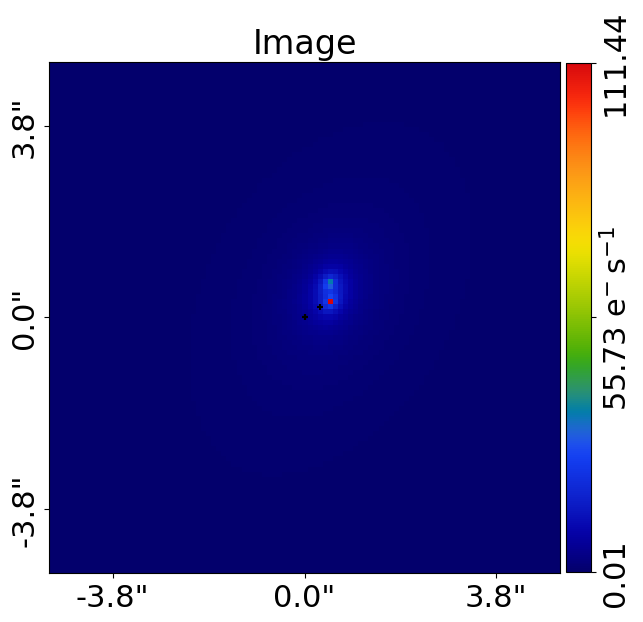

In [31]:
galaxies_plotter = aplt.GalaxiesPlotter(galaxies=galaxies, grid=grid)
galaxies_plotter.figures_2d(image=True)

A subplot of each individual galaxy image can also be created.

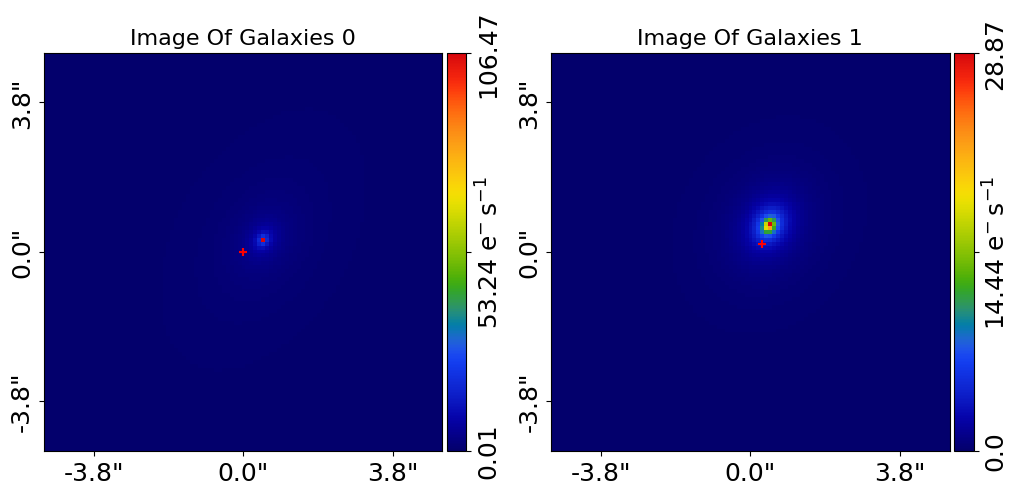

In [32]:
galaxies_plotter.subplot_galaxy_images()

Because galaxy light distributions often follow a log10 pattern, plotting in log10 space helps reveal details in the 
outskirts of the light profile.

This is especially helpful when visualizing how multiple galaxies overlap.

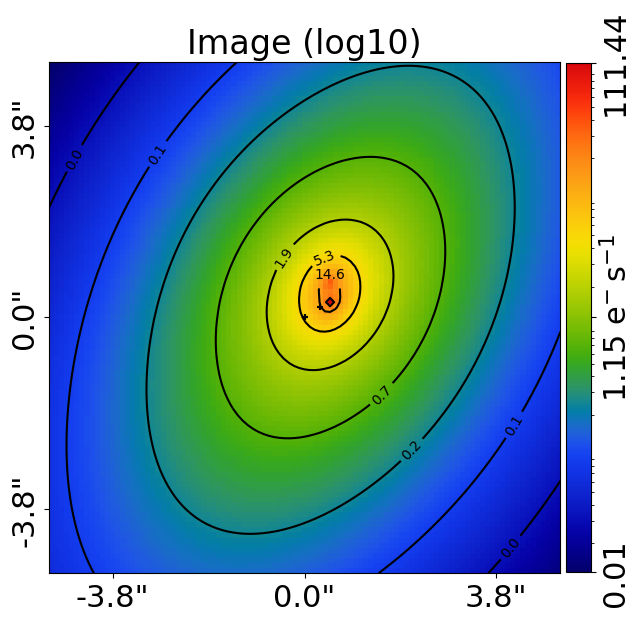

In [33]:
galaxies_plotter = aplt.GalaxiesPlotter(
    galaxies=galaxies, grid=grid, mat_plot_2d=aplt.MatPlot2D(use_log10=True)
)
galaxies_plotter.figures_2d(image=True)

__Unit Conversion__

Earlier, we mentioned that a galaxy’s `redshift` allows us to convert between arcseconds and kiloparsecs.

A redshift measures how much a galaxy's light is stretched by the Universe's expansion. A higher redshift means the 
galaxy is further away, and its light has been stretched more. By knowing a galaxy’s redshift, we can convert angular 
distances (like arcseconds) to physical distances (like kiloparsecs).

To perform this conversion, we use a cosmological model that describes the Universe's expansion. Below, we use 
the `Planck15` cosmology, which is based on observations from the Planck satellite.

In [34]:
cosmology = ag.cosmo.Planck15()

kpc_per_arcsec = cosmology.kpc_per_arcsec_from(redshift=galaxy.redshift)

print("Kiloparsecs per Arcsecond:")
print(kpc_per_arcsec)


Kiloparsecs per Arcsecond:
6.288231448626936


This `kpc_per_arcsec` can be used as a conversion factor between arcseconds and kiloparsecs when plotting images of
galaxies.

We compute this value and plot the image in converted units of kiloparsecs.

This passes the plotting modules `Units` object a `ticks_convert_factor` and manually specified the new units of the
plot ticks.

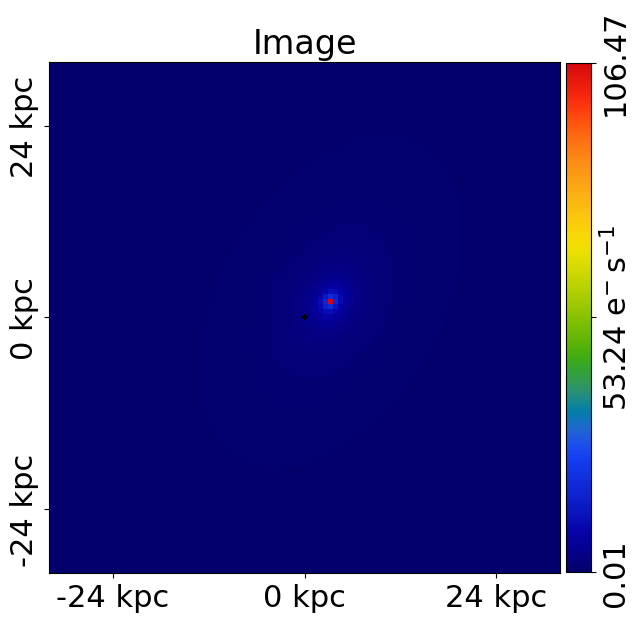

In [35]:
units = aplt.Units(ticks_convert_factor=kpc_per_arcsec, ticks_label=" kpc")

mat_plot = aplt.MatPlot2D(units=units)

galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy, grid=grid, mat_plot_2d=mat_plot)
galaxy_plotter.figures_2d(image=True)

__Wrap Up__

You've learnt the basic quantities used to study galaxy morphology. 

Lets summarize what we've learnt:

- **Grids**: WA grid is a set of 2D coordinates that represent the positions where we measure the light of a galaxy. 

- **Geometry**: How to shift, rotate, and convert grids to elliptical coordinates.

- **Light Profiles**: Mathematical functions that describe how a galaxy's light is distributed in space. We've used 
  the `Sersic` profile to create images of galaxies.

- **Galaxies**: Galaxies are collections of light profiles that represent a galaxy's light. We've created galaxies with 
  multiple light profiles and visualized their images.

- **Unit Conversion**: By assuming redshifts for galaxies we can convert their quantities from arcseconds to kiloparsecs.